<a href="https://colab.research.google.com/github/blazaropinto/PDA_Data_Analysis_Python/blob/main/Correlation_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces two new libraries:

**matplotlib**

A library of functions for plotting static, animated and interactive visualisations of data sets.  For ease, pandas use matplotlib for plotting a range of charts.

**scipy**

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient (R squared) is calculated from the `regression.rvalue` `r_squared = rvalue * rvalue` and indicates how closely (as a percentage) the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit.  
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  calculate and display **r_squared** from rvalue (`regression.rvalue`)  
(*Expected output:  0.021866754112003717 - this value is used to calculate R squared, the correlation coefficient which indicates how closely the that there is a very weak correlation between Age and Income.  The negative value of rvalue indicates that any correlation is inverse, ie as Age goes up, Income goes down*) 

In [1]:
import pandas as pd
from scipy.stats import linregress

url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = "county-level")
county_level_df.head()


,State,County,Population,Age,Income
0,TX,1,72,34,65
1,TX,2,33,42,45
2,TX,5,25,23,46
3,TX,6,54,36,65
4,TX,7,11,42,53


In [2]:
# complete the lines of code (reference the instructions above)
x = county_level_df.Age
y = county_level_df.Income
regression = linregress(x,y)
# display the regression
display(regression)
# display the slope
display(regression.slope)
# display the intercept
display(regression.intercept)
# calculate and display r_squared
r_squared = regression.rvalue ** 2
display(r_squared)

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)

-0.31433084434233205

72.78388856978748

0.021866754112003717

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Test output**:   
0.013558605755058871


In [3]:
regression_pop_inc = linregress(county_level_df.Population, county_level_df.Income)
display(regression_pop_inc.rvalue ** 2)

0.013558605755058871

--> Those variables seem to have no correlation (or very low)

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [4]:
url_ex3 = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true%22'

new_df = pd.read_csv(url_ex3)
new_df.head()

,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Chinese,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Chinese,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017


In [5]:
regression_stress = linregress(new_df.Stress, new_df.Wellbeing)
display (regression_stress, regression_stress.rvalue**2, regression_stress.pvalue)
slope_stress  = regression_stress.slope
intercept_stress = regression_stress.intercept

LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)

0.4507725540176983

6.084540561441803e-07

--> Assuming an alpha value of 0.05, p is lower so the prediction is good

--> R squared is close to 0.5, so the variables seem to be fairly correlated but doesn't really behave in the same way

In [6]:
def check_significance_regression(p_value, alpha):
  if p_value < alpha:
    return "It's a good model"
  else:
    return "The model isn't statistically significant"


print(check_significance_regression(regression_pop_inc.pvalue, 0.05))
print(check_significance_regression(regression_stress.pvalue, 0.05))

The model isn't statistically significant
It's a good model


# Visualising the data
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use matplotlib, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted 
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 4 to 10 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true 

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name = 'Country Migration')
df.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,High Income,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,Upper Middle Income,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02


<BarContainer object of 7 artists>

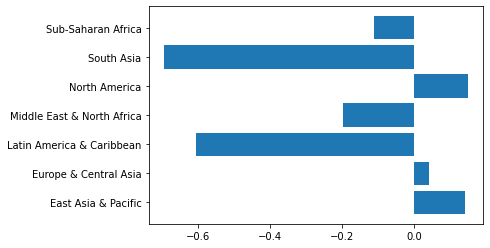

In [8]:
# create new dataframe - regions - from groupby 'base_country_wb_region' and calculating the means
regions = df.groupby('base_country_wb_region').mean()

# get the data values series from the column 'net_per_10K_2017'
data = regions.net_per_10K_2017

# get the x axis labels from the data keys
labels = data.keys()

# plot the bar chart (horizontal plot) from the labels and data
plt.barh(labels, data)


### Exercise 4 - Line plot of net migration 
--- 

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings) 
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

In [9]:
df_net_migration = df[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']]
mean_2015_2019 = df_net_migration.sum()
mean_2015_2019

net_per_10K_2015    1915.37
net_per_10K_2016     623.23
net_per_10K_2017    -332.97
net_per_10K_2018    -168.37
net_per_10K_2019     -94.34
dtype: float64

In [10]:
labels_mig = list(mean_2015_2019.keys())
labels_mig

['net_per_10K_2015',
 'net_per_10K_2016',
 'net_per_10K_2017',
 'net_per_10K_2018',
 'net_per_10K_2019']

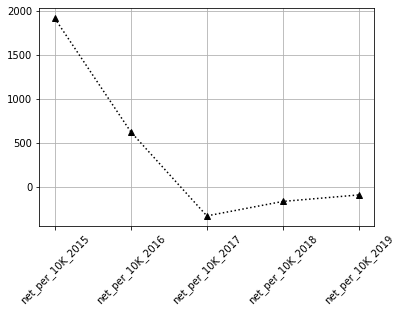

In [11]:
plt.plot(labels_mig, mean_2015_2019[labels_mig], '^k:' )
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Exercise 5 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  
 
* split the migration columns into a new dataframe
* create a data variable from the sum() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Maximum net migration') to name your axis 
* display your bar graph with plt.show 

In [22]:
df_net_migration = df[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']]
mig_sum = df_net_migration.sum()
mig_sum

net_per_10K_2015    1915.37
net_per_10K_2016     623.23
net_per_10K_2017    -332.97
net_per_10K_2018    -168.37
net_per_10K_2019     -94.34
dtype: float64

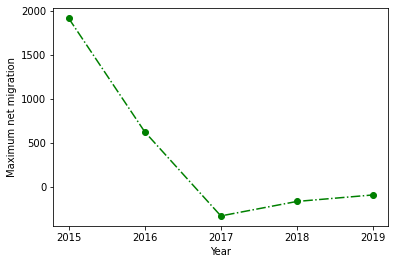

In [23]:
labels_count = ['2015','2016','2017','2018','2019']
plt.plot(labels_count, mig_sum, 'og-.')
plt.xlabel('Year')
plt.ylabel('Maximum net migration')
plt.show()

### Exercise 6 - creating a bar graph using grouped data 
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`' 
* extract your labels (x) using the .keys() function 
* use the plt.barh(x, y) to create a horizontal bar graph 
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

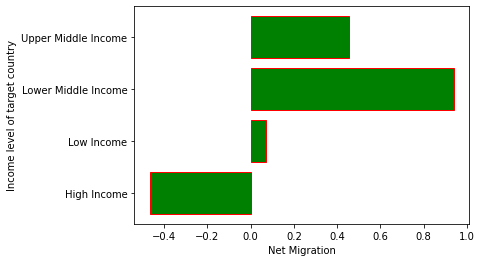

In [25]:
means_inc2019 = df.groupby('target_country_wb_income')['net_per_10K_2019'].mean()
labels_inc2019 = means_inc2019.keys()
plt.barh(labels_inc2019, means_inc2019, color='g', edgecolor='r')
plt.xlabel('Net Migration')
plt.ylabel('Income level of target country')
plt.show()

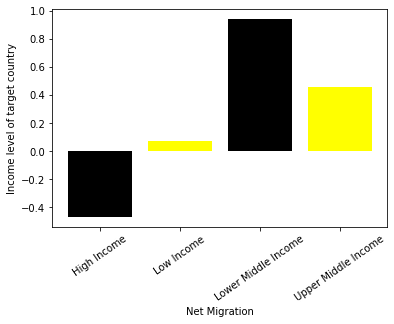

In [35]:
plt.bar(labels_inc2019, means_inc2019, color=['black', 'yellow'])
plt.xlabel('Net Migration')
plt.ylabel('Income level of target country')
plt.xticks(rotation=35)
plt.show()

# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

In [16]:
psycho_url = 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true%22'
psych_data = pd.read_csv(psycho_url)
psych_data.head()

,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Chinese,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Chinese,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017


### Exercise 7 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 6 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




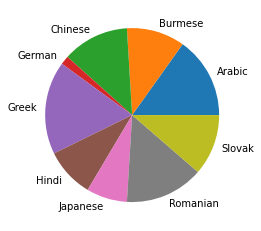

In [17]:
psy_bylanguage = psych_data.groupby('firstlanguage').mean()
psy_data = psy_bylanguage.Stress
psy_labels = psy_data.keys()
plt.pie(psy_data, labels = psy_labels)
plt.show()

--> Lots of languages missing in this data (spoken by lots of people)...

--> We cannot get any conclusion out of just one graph.. (germans are relaxed or badly represented?)

### Exercise 8 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median. 

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels="Wellbeing") to create boxplot 
*  show the boxplot

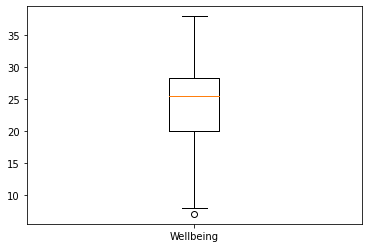

In [18]:
data_w = psych_data.Wellbeing
plt.boxplot(data_w, labels=['Wellbeing'])
plt.show()

### Exercise 9 - Histograms of  age 
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)` 
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


Text(0, 0.5, 'Frequency')

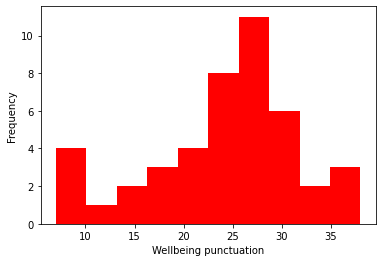

In [19]:
plt.hist(data_w, color='red')
plt.xlabel('Wellbeing punctuation')
plt.ylabel('Frequency')

### Exercise 10 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Earlier in exercise 3, we found that Stress significantly predicted Wellbeing.

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   

* create a regression variable and assign the result of using linregress 
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plt.plot(x, slope*x + intercept) 

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




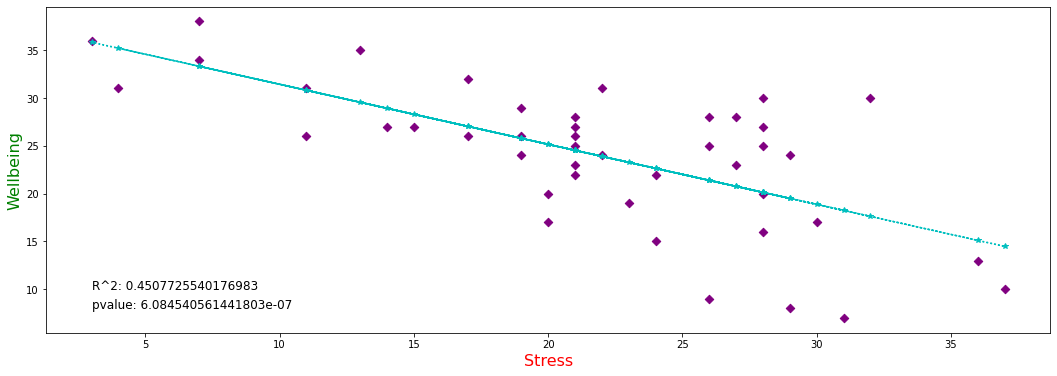

In [20]:
x = psych_data.Stress
y = psych_data.Wellbeing

plt.figure(figsize=(18,6))
plt.scatter(x,y, c='purple', marker='D')

regression_sw = linregress(x,y)
slope = regression_sw.slope
intercept = regression_sw.intercept
plt.plot(x, slope*x + intercept, '*c:')

plt.xlabel('Stress', color='red', fontsize=16) 
plt.ylabel('Wellbeing', color='green', fontsize=16)
plt.text(3,8, 'pvalue: '+ str(regression_sw.pvalue), fontsize=12)
plt.text(3,10, 'R^2: '+ str(regression_sw.rvalue**2), fontsize=12)

plt.show()

## Data story
---

By observing the **purple dots** (i.e. the actual data) we can notice a correlation between the 2 variables: *the level of wellbeing decreases as the level of stress increases*. 

The **light blue line** represents the data model, which according to the R squared value account for a good percentage of the variability of the data. Besides, the extremely low p value tells the model is *statistically significant*, so these **variables are inversely correlated**.

In other words, the data is showing that an increase in the wellbeing of people is **related** to a reduction in reducing their levels of stress, or that higher levels of stress is related to lower feelings of wellbeing. In any case, these data does **not** tell one variable increasing is **causing** the other to decrease nor it is telling us anything about the directionality of this relation.

# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)